In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib as mpt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import pickle as pkl

In [2]:
%matplotlib inline

In [3]:
mpt.rcParams['figure.dpi'] = 300

In [5]:
def Box_plot(Group1, Group2, Metadata, x_label_list, Corr, TITLE, Dataset, Colors):
    titles = ['Persistent entropy', '$L^1$-norm', '$L^2$-norm']
    fig, axes = plt.subplots(1, 3, figsize=(6, 2), facecolor='white', constrained_layout=True)
    meanprops = dict(marker='.', markeredgecolor='black', markerfacecolor='black', markersize=6)
    pvals = []
    for i, ax, title in zip(range(0,5,2), axes.flatten(), titles):
        p = stats.ttest_ind(Metadata[i],Metadata[i+1],equal_var=False)[1]
        pvals.append(p)
        data = [Metadata[i],Metadata[i+1]]
        violin = sns.violinplot(data=data, ax=ax, cut = 0, inner=None)
        for ord, body in enumerate(violin.collections):  
            body.set_facecolor(Colors[ord])
            body.set_alpha(0.9) 
            body.set_edgecolor("black")
            body.set_linewidth(0.5)
        sns.boxplot(data=data, ax=ax, width=0.08, showcaps=False, showfliers=False, whiskerprops={'linewidth': 0.7},
                    boxprops={'facecolor': 'black', 'edgecolor': 'black', 'linewidth': 0.1, 'zorder': 3})
        #             medianprops={ "color": 'white', 'markersize': 6, 'zorder': 4})
        print(title,': ', p)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.set_title(title, fontsize=9, ha='center', pad = 10)
        axes[0].set_ylabel('Values', fontsize=9)
        ax.set_xticklabels(x_label_list , fontsize=8)
        ax.tick_params(axis='y', labelsize=6, width=0.4, pad=1, length=3)
        ax.tick_params(axis='x', width=0.4, length=3)
        ax.spines['bottom'].set_linewidth(0.4)
        ax.spines['left'].set_linewidth(0.4)
        bottom, top = ax.get_ylim()
        y_range = top - bottom
        # significant_combination = [(1,2),p]
        x1 = 0
        x2 = 1
        level = 2 #len(significant_combination)
        # Plot the bar
        bar_height = (y_range * 0.035 * level) + top
        bar_tips = bar_height - (y_range * 0.01)
        ax.plot([x1, x1, x2, x2], [bar_tips, bar_height, bar_height, bar_tips], lw=0.4, c='k')
        if p < 0.001:
            sig_symbol = '***'
        elif p < 0.01:
            sig_symbol = '**'
        elif p < 0.05:
            sig_symbol = '*'
        else:
            sig_symbol = 'X'
        text_height = bar_height + (y_range * 0.005)
        ax.text((x1 + x2) * 0.5, text_height, sig_symbol, ha='center', va='bottom', c='k', fontsize=8)
        means = [np.mean(data[0]), np.mean(data[1])]
        for num, mean in enumerate(means):
            ax.scatter(num, mean, color='white', marker='o', s=10, zorder=5, label='Mean' if num == 0 else "") #, edgecolors='magenta'
    print(pvals)
    plt.suptitle(TITLE)
    text_x = 0.5
    text_y = -0.05
    fig.text(text_x, text_y, r'   $\bigcirc$: mean,  **: $p < 0.01$,  ***: $p < 0.001$   ',ha='center', va='center', fontsize=5)
    line_length = 0.25  # Length of the line (20% of figure width)
    line_x_start = text_x - line_length / 2
    line_x_end = text_x + line_length / 2
    line_y_top = text_y + 0.04
    line_y_bottom = text_y - 0.04
    
    line_top = Line2D([line_x_start, line_x_end], [line_y_top, line_y_top], transform=fig.transFigure, color='black', linewidth=0.5)
    line_bottom = Line2D([line_x_start, line_x_end], [line_y_bottom, line_y_bottom], transform=fig.transFigure, color='black', linewidth=0.5)
    fig.lines.extend([line_top, line_bottom])
    # plt.savefig(f'../OutputFiles/Output_Plots/{Dataset}_violin_global_{Corr}_PEL1L2.pdf',bbox_inches='tight', dpi= 600)
    return None


# Meta-data

In [6]:
# dataset = 'MPI_LEMON'
dataset = 'ABIDE'

# CorrType = 'PosCorr'
CorrType = 'AllCorr'

path = f'../OutputFiles/{CorrType}/{dataset}/' 

if dataset == 'MPI_LEMON':
    Group1, Group2 = 'Young', 'Elderly'
    x_label_list = ['Young', 'Elderly']
    TITLE = 'MPI_LEMON'
    Colors = ["darkgray", "navajowhite"]
elif dataset == 'ABIDE':
    Group1, Group2 = 'Healthy', 'ASD'
    x_label_list = ['TD', 'ASD']
    Colors = ["#9c8bb0", "#a9d2c3"]
    TITLE = 'ABIDE-I'


Group1_Global_data = pd.read_csv(path + f'{Group1}_L1L2PE.txt', sep = '\t')
Group2_Global_data = pd.read_csv(path + f'{Group2}_L1L2PE.txt', sep = '\t')
print(Group1,'\n', Group1_Global_data[['L1_norm', 'L2_norm', 'pe_dim']].mean())
print(Group2,'\n', Group2_Global_data[['L1_norm', 'L2_norm', 'pe_dim']].mean())

Healthy 
 L1_norm    3.428484
L2_norm    0.544434
pe_dim     5.513161
dtype: float64
ASD 
 L1_norm    3.027599
L2_norm    0.509080
pe_dim     5.531963
dtype: float64


In [7]:
G1_L1 = Group1_Global_data['L1_norm']
G2_L1 = Group2_Global_data['L1_norm']
G1_L2 = Group1_Global_data['L2_norm']
G2_L2 = Group2_Global_data['L2_norm']
G1_PE = Group1_Global_data['pe_dim']
G2_PE = Group2_Global_data['pe_dim']


Metadata = [G1_PE, G2_PE, G1_L1, G2_L1, G1_L2, G2_L2]

print(path, '\n',Group1, len(Group1_Global_data), ',', Group2, len(Group2_Global_data), '\nDataset:', dataset,'\nTitle: ', TITLE, '\nCorr', CorrType)

../OutputFiles/AllCorr/ABIDE/ 
 Healthy 425 , ASD 395 
Dataset: ABIDE 
Title:  ABIDE-I 
Corr AllCorr


Persistent entropy :  2.4388818225233733e-08
$L^1$-norm :  1.1647831978994615e-11
$L^2$-norm :  7.327987808569357e-06
[2.4388818225233733e-08, 1.1647831978994615e-11, 7.327987808569357e-06]


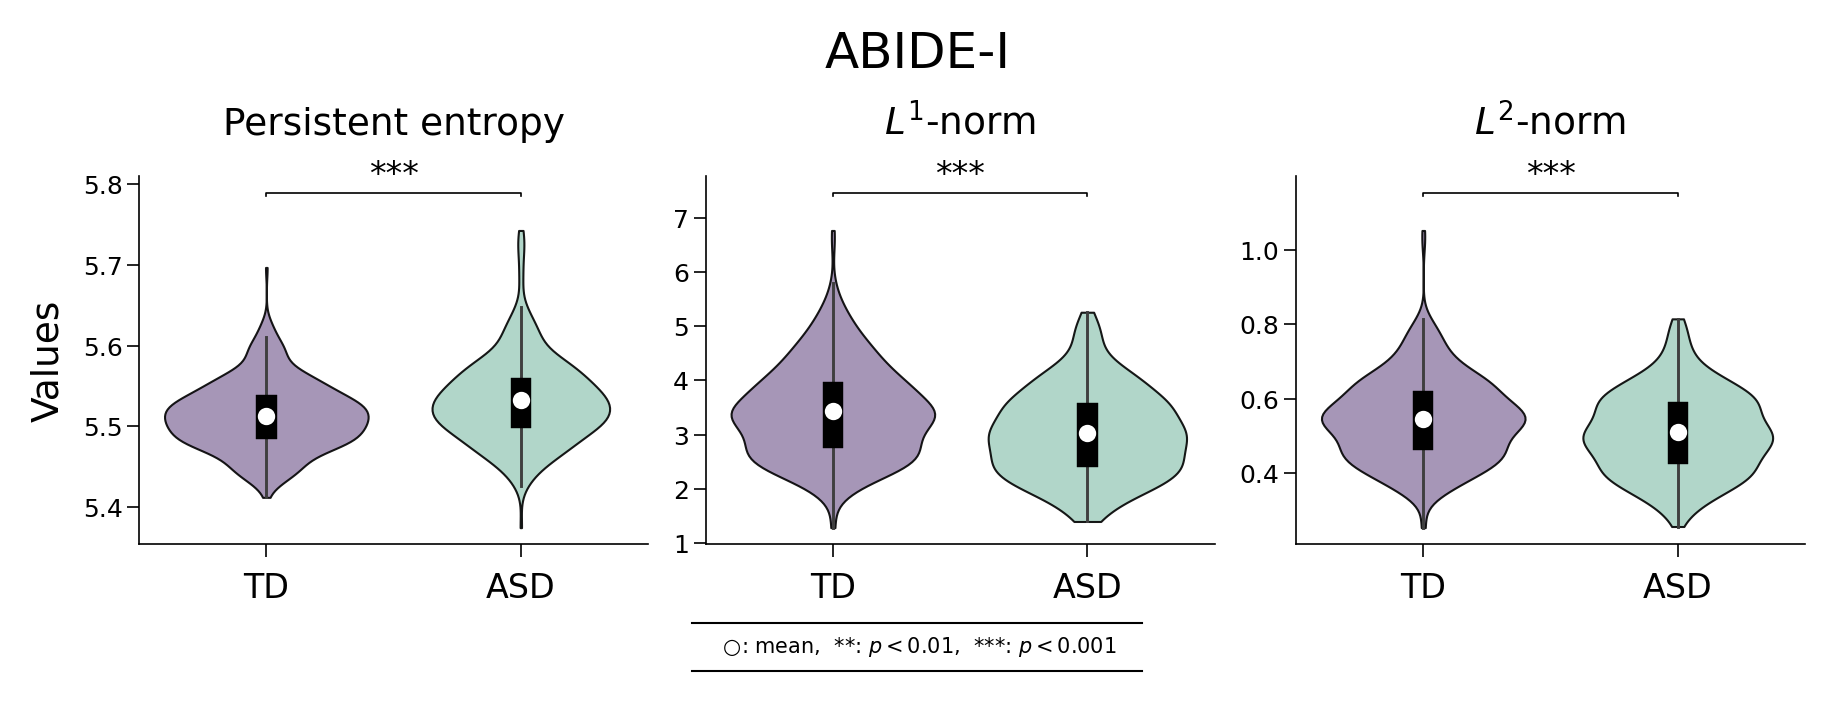

In [8]:
plot = Box_plot(Group1, Group2, Metadata, x_label_list, CorrType, TITLE, dataset, Colors)